Los datos terminaron de generarse


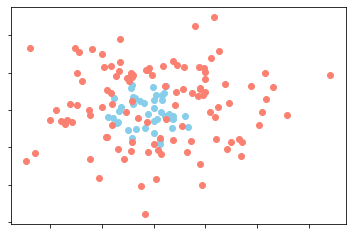

In [1]:
'''
USETED DEBE INGORAR LA DE LA LINEA 4 A LA LINEA 74 DE ESTE SCRIPT
'''
import random
import sys
import operator

try:
    import matplotlib.pyplot as plt
except:
    import subprocess
    subprocess.check_call(
        [sys.executable, '-m', 'pip', 'install', 'matplotlib']
    )
    import matplotlib.pyplot as plt

v_8 = True if sys.version_info > (3, 8, 0) else False

rand_unif = random.Random(567)
def set_class(point):
    x, y = point
    p = abs(x)** 2 + abs(y)** 2
    
    unif = rand_unif.random()
    point_class = 1 if unif < p else 0

    return point_class

def generate_data(n=150, test=False):
    if test:
        random.seed(123)
    else:
        random.seed(987)
    
    if v_8:
        trian_set = {
            (x := random.gauss(0, 1), y := random.gauss(0, 1)): set_class((x, y))
            for i in range(n)
        }
    else:
        features = [(random.gauss(0, 1), random.gauss(0, 1)) for i in range(n)]
        trian_set = {point: set_class(point) for point in features}
    
    return trian_set


def plot_data(data):
    x_0, y_0, x_1, y_1 = [], [], [], []
    for k in train_data:
        if train_data.get(k) == 0:
            x_0.append(k[0])
            y_0.append(k[1])
        else:
            x_1.append(k[0])
            y_1.append(k[1])
    # plt.figure(figsize=(8, 8))

    plt.scatter(x_0, y_0, c="skyblue")
    plt.scatter(x_1, y_1, c="salmon")

    plt.tick_params(labelbottom=False, labelleft=False)
    plt.show()


def plot_MSE_k(dict_resultados):
    x = list(dict_resultados.keys())
    y = list(dict_resultados.values())

    plt.plot(x, y, '.-')
    plt.xlabel('Valor de k')
    plt.ylabel('Error')

    plt.show()

'''
--------------------------------------------------------------------------------
ACÁ COMIENZA EL TALLER
--------------------------------------------------------------------------------
'''

'''
Recuerde que los datos tienen la siguiente estructura:
{
    vector_caracterisitcas_1: clase,
    vector_caracterisitcas_2: clase,
    .
    .
    .
}
'''
## No cambie esto
train_data = generate_data(150, True)
test_data = generate_data(1000)

print('Los datos terminaron de generarse')
## -----------------------------------------------------------------------------

# Si quiere ver la gráfica de los datos de entrenamiento cambie el valor de la
# variable `ver_datos` a True
ver_datos = True
if ver_datos:
    plot_data(train_data)
# ------------------------------------------------------------------------------

In [2]:
# TODO: Cree una función: calcule la distancia euclidiana en R^2 entre dos 
# vectores x, y.
def euclidean_distance(x, y):
    R = ((x[0]-y[0])**2)+((x[1]-y[1])**2)
    distancia = R**(1/2)
    return distancia
    pass

In [3]:
# TODO: Cree una función: Dado un vector x, retrona el vector de los datos 
#  de entrenamiento que minimiza la distancia euclidiana a x.
# *Debe usar la función euclidean_distance
def nearest_neighbor(x):
    l ={}
    for i in train_data.keys():
        l[i] = euclidean_distance(x, i)

    l = dict(sorted(l.items(), key=operator.itemgetter(1)))
    return list(l.keys())[0:1]

    pass

In [4]:
# TODO: Cree una función: Dado un vector x y un entero k, retrona los k vectores 
# mas cercanos de los datos de entrenamiento.
# *Debe usar la función euclidean_distance

def k_nearest_neighbors(x, k):
    l ={}

    for i in train_data.keys():
        l[i] = euclidean_distance(x, i)

    l = dict(sorted(l.items(), key=operator.itemgetter(1)))
    
    return list(l.keys())[0:k]

    pass

In [5]:
# TODO: Cree una función: Dado una vector x y un entero k, haga la prediccion de 
# cual debe ser su clase (binaria) según el algoritmo de kNN
# *Debe utilizar la función k_neares_neighbors(x, k)


#SUPONEMOS QUE ES IMPAR 

def predict_class(x, k):
    vmc = k_nearest_neighbors(x, k)
    targets_vmc = []
    target_predict = None

    for e in vmc:
        if e in list(train_data.keys()): 
            targets_vmc.append(train_data[e])
    
    clase1 = targets_vmc.count(1)
    clase0 = targets_vmc.count(0)

    if clase1 > clase0:
        target_predict = 1
    else:
        target_predict = 0

    return target_predict

    pass

In [6]:
# TODO: Cree una función: Dado un entero k, Haga la prediccion de los vectores 
# en los datos de evaluacion, y guarde sus predicciones en una variable de 
# diccionario donde cada llave es el vector x y el valor es su respectiva 
# predicción. Retorne el diccionario
# *Debe utilizar la función predict_class()

def predict_test_set(k):
    predicciones = {}
    for i in list(test_data.keys()) :
        predicciones[i]=predict_class(i, k)
    return predicciones
    pass

In [7]:
# TODO: Cree una función: Dado un vector de predicciones y un vector de valores 
# reales, calcule el MSE y retornelo
def MSE(y_obs, y_real):
    N = len(y_obs)
    E = []
    for i in range(len(y_obs)):
        E.append((y_obs[i]-y_real[i])**2)
    MSE = (sum(E) / N)
    return MSE
    pass

In [8]:
# TODO: Haga una iteración con valores de k entre 1 a 100 con saltos de 2 y
# calcule el MSE de cada una de sus funciónes kNN. Guarde estos resultados en
# un diccionario donde las llaves sean el k que esta utilizando y el valor sea
# su respectivo MSE

dict_resultados = {}

for k in range(1, 100, 2):
    dict_resultados[k] = MSE(list(test_data.values()), list(predict_test_set(k).values()))
    pass

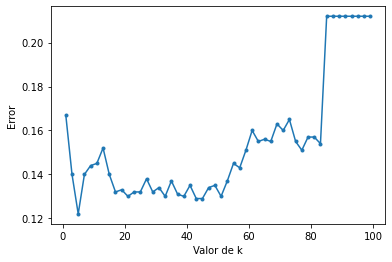

In [9]:
# TODO: Utilice la función plot_MSE_k (que esta creada en la parte que no es 
# del taller) para ver la grafica de sus errores. Esta función solo recibe la el
# diccionario que usted construyo en el paso anterior

plot_MSE_k(dict_resultados)